In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('train_s3TEQDk.csv')
test=pd.read_csv('test_mSzZ8RL.csv')

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# Check the data

In [4]:
print("customers data -  rows:",train.shape[0]," columns:", train.shape[1])

customers data -  rows: 245725  columns: 11


Let's look into more details to the data.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [6]:
 train['Gender'].value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [7]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


# Data unbalance

Let's check data unbalance with respect with target value, i.e. Is_Lead.

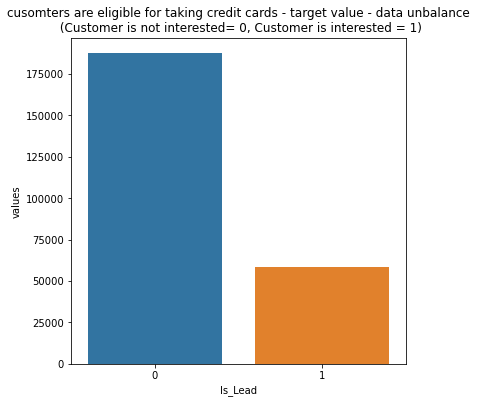

In [8]:
temp = train["Is_Lead"].value_counts()
df = pd.DataFrame({'Is_Lead': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('cusomters are eligible for taking credit cards - target value - data unbalance\n (Customer is not interested= 0, Customer is interested = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'Is_Lead', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

Customer is not interested taking credit cards higher than Cusomter is interested taking credit cards

# Data exploration


Check missing data

In [9]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [10]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

There is missing data in Credit_Product column.

In [11]:
train['Credit_Product']=train['Credit_Product'].fillna('Others')

In [12]:
test['Credit_Product']=test['Credit_Product'].fillna('Others')

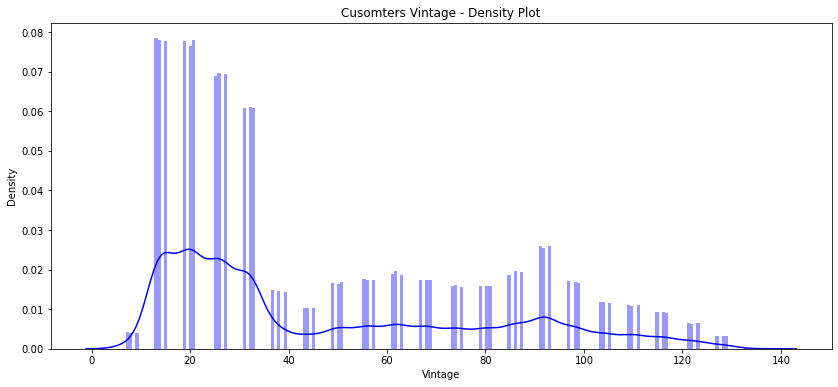

In [13]:
plt.figure(figsize = (14,6))
plt.title('Cusomters Vintage - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(train['Vintage'],kde=True,bins=200, color="blue")
plt.show()

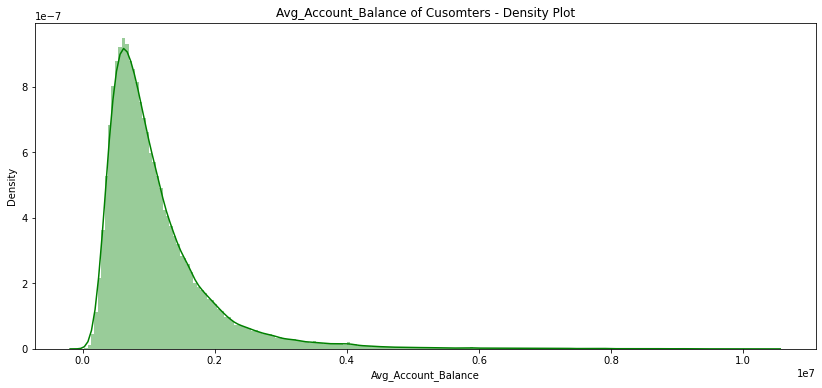

In [14]:
plt.figure(figsize = (14,6))
plt.title('Avg_Account_Balance of Cusomters - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(train['Avg_Account_Balance'],kde=True,bins=200, color="green")
plt.show()

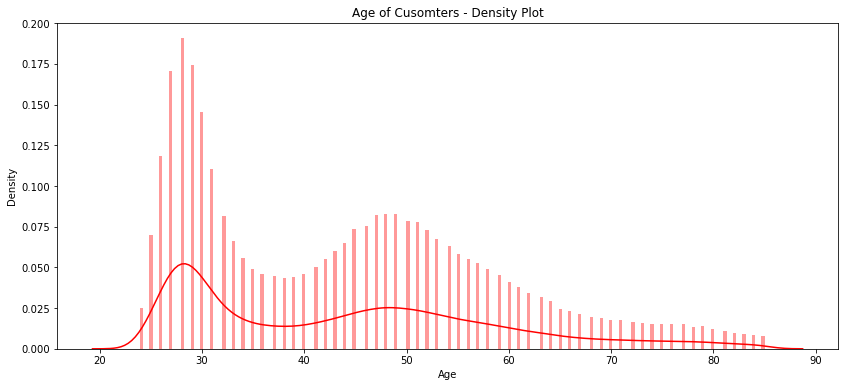

In [15]:
plt.figure(figsize = (14,6))
plt.title('Age of Cusomters - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(train['Age'],kde=True,bins=200, color="Red")
plt.show()

In [16]:
train['Occupation'].unique()

array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object)

Looks we have some outliers

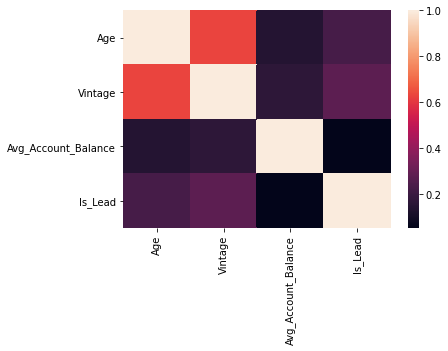

In [17]:
corr = train.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

In [18]:
train['Gender']=train['Gender'].map({'Female':0,'Male':1})
train['Occupation']=train['Occupation'].map({'Other':0,'Salaried':1,'Self_Employed':2,'Entrepreneur':3})
train['Channel_Code']= train['Channel_Code'].map({'X1':0,'X2':2,'X3':3,'X4':4})
train['Credit_Product'] = train['Credit_Product'].map({'Others':0,'No':1,'Yes':2})
train['Is_Active']  = train['Is_Active'].map({'No':0,'Yes':1})

In [19]:
test['Gender']=test['Gender'].map({'Female':0,'Male':1})
test['Occupation']=test['Occupation'].map({'Other':0,'Salaried':1,'Self_Employed':2,'Entrepreneur':3})
test['Channel_Code']= test['Channel_Code'].map({'X1':0,'X2':2,'X3':3,'X4':4})
test['Credit_Product'] = test['Credit_Product'].map({'Others':0,'No':1,'Yes':2})
test['Is_Active']  = test['Is_Active'].map({'No':0,'Yes':1})

In [20]:
X=train.drop(['ID','Is_Lead','Region_Code'],axis=1)
Y=train['Is_Lead']

test_df=test.drop(['ID','Region_Code'],axis=1)

In [21]:
test.isnull().sum()


ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.25,random_state=48)
 

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [142]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=100)
clf.fit(X_train, y_train)



RandomForestClassifier(max_depth=100)

In [143]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])


0.8477231463634742

In [43]:
preds = clf.predict(test)

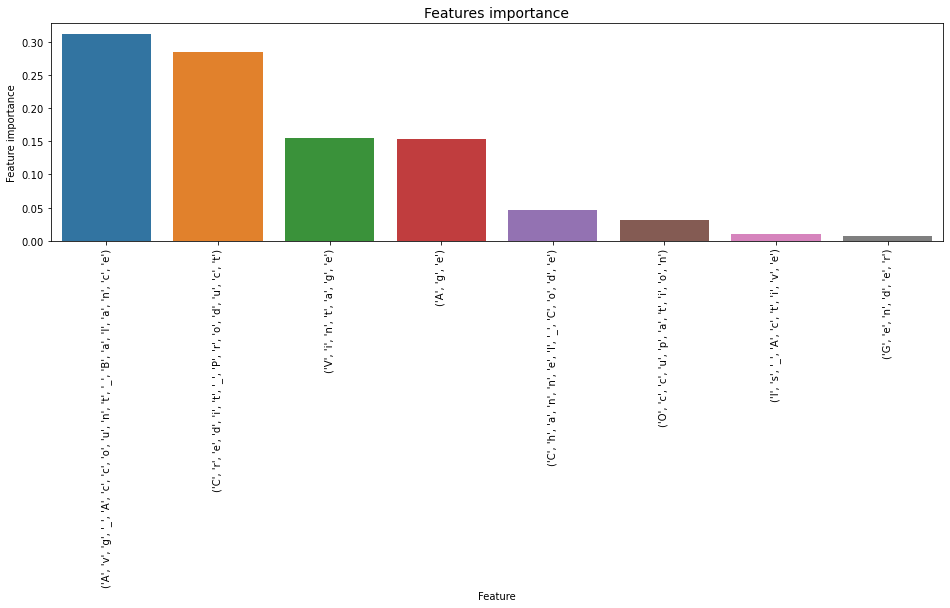

In [35]:
tmp = pd.DataFrame({'Feature': X_test, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (16,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()


In [36]:
target = 'Is_Lead'

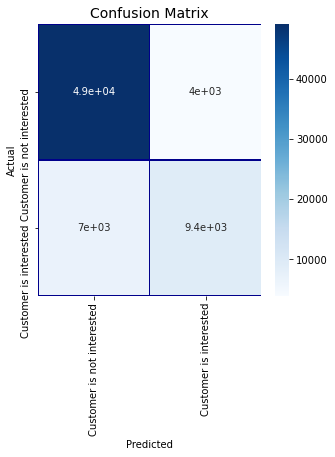

In [38]:
cm = pd.crosstab(y_test.values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Customer is not interested', 'Customer is interested'],
            yticklabels=['Customer is not interested', 'Customer is interested'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [51]:
import lightgbm as lgb
import xgboost as xgb

In [146]:
RANDOM_STATE= 48

dtrain = xgb.DMatrix(X_train, y_train.values)
dvalid = xgb.DMatrix(X_test, y_test.values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 5
params['subsample'] = 0.6
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE


In [29]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

In [148]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS,
                watchlist,
                early_stopping_rounds=EARLY_STOP, 
                maximize=True,
                verbose_eval=VERBOSE_EVAL)

[16:50:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.75553	valid-auc:0.75604
[50]	train-auc:0.87095	valid-auc:0.86970
[100]	train-auc:0.87409	valid-auc:0.87227
[150]	train-auc:0.87640	valid-auc:0.87391
[200]	train-auc:0.87777	valid-auc:0.87422
[248]	train-auc:0.87892	valid-auc:0.87416


In [42]:
from catboost import CatBoostClassifier,Pool, cv
from sklearn.model_selection import StratifiedKFold,train_test_split

from sklearn.ensemble import RandomForestClassifier

In [57]:

#categorical_features_indices = np.where(X_train.dtypes =='category')[0]
#categorical_features_indices
m2=CatBoostClassifier(n_estimators=3000,random_state=1994,
                         eval_metric='AUC',learning_rate=0.05,random_strength=200,
                      bagging_temperature=0.6,
                      l2_leaf_reg=4,
                      class_weights={0:0.239947,1:0.760053},
                      min_data_in_leaf=5,
                      #auto_class_weights='Balanced',
                      task_type='GPU')
m2.fit(X_train,y_train,eval_set=[(X_test, y_test)], early_stopping_rounds=100,verbose=200)
p=m2.predict_proba(X_test)[:,-1]
print(roc_auc_score(y_test,p))

0:	learn: 0.8180951	test: 0.8176526	best: 0.8176526 (0)	total: 45.5ms	remaining: 2m 16s
200:	learn: 0.8719901	test: 0.8704142	best: 0.8704146 (199)	total: 6.23s	remaining: 1m 26s
400:	learn: 0.8773949	test: 0.8740660	best: 0.8740731 (399)	total: 12.4s	remaining: 1m 20s
600:	learn: 0.8801575	test: 0.8741894	best: 0.8742267 (573)	total: 18.7s	remaining: 1m 14s
bestTest = 0.8742266595
bestIteration = 573
Shrink model to first 574 iterations.
0.8742266926770935


In [58]:
pred1=m2.predict(test_df)

In [65]:
dtest = xgb.DMatrix(test_df)
ypred1= model.predict(dtest)

In [66]:
ypred1

array([0.06153068, 0.8515394 , 0.04912647, ..., 0.10012583, 0.22899687,
       0.04559229], dtype=float32)

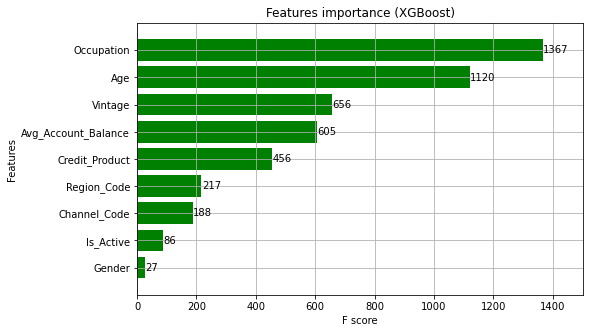

In [72]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [ ]:
err=[]
y_pred_tot=[]

from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit
fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
for train_index, test_index in fold.split(X[feat_cols],Y):
    X_train, X_test = X[feat_cols].iloc[train_index], X[feat_cols].iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    m1=CatBoostClassifier(n_estimators=2000,random_state=1994,eval_metric='AUC',learning_rate=0.05,random_strength=200,bagging_temperature=0.6,l2_leaf_reg=8,one_hot_max_size=20)
    m1.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=200)
    preds=m1.predict_proba(X_test,ntree_end=m.best_iteration_)[:,-1]
    print("err: ",roc_auc_score(y_test,preds))
    err.append(roc_auc_score(y_test,preds))
    p = m1.predict_proba(Xtest[feat_cols],ntree_end=m.best_iteration_)[:,-1]
    y_pred_tot.append(p)

In [ ]:
ypred2=m.predict(test_df)

In [ ]:
sub=pd.DataFrame({'ID':test['ID'],'Is_Lead':ypred2})
sub.head()

In [138]:
import base64
import pandas as pd
from IPython.display import HTML

def create_download_link( sub, title = "Download CSV file", filename = "catboost.csv"):
    csv = sub.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)


create_download_link(sub)